# Image Analysis: Classifying Clothes


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn as sklearn



In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train/255.0
X_test= X_test/255.0

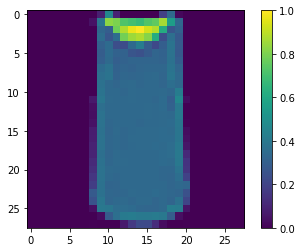

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)
plt.show()


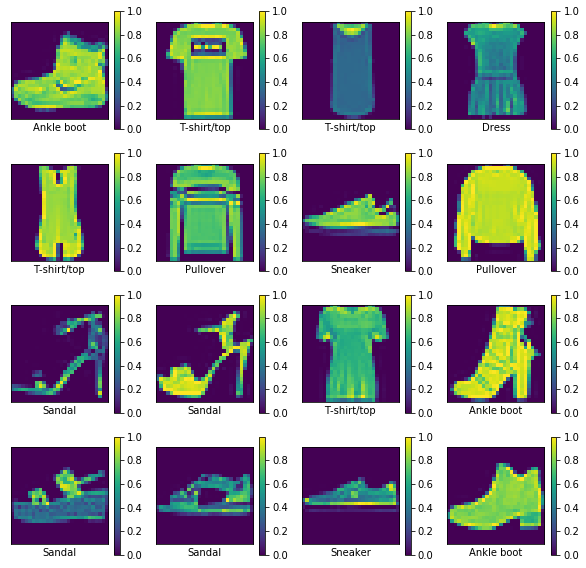

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.colorbar()
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer= 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics= ['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs =10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 403us/sample - loss: 0.4943 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3745 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3356 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3117 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2942 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2776 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2662 - accuracy: 0.9019
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2553 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2459 - accuracy: 0.9082
Epoch 10/1

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)

10000/1 - 1s - loss: 0.2368 - accuracy: 0.8786


In [10]:
probability = tf.keras.Sequential([model,
                                  keras.layers.Softmax()])

In [11]:
prediction = probability.predict(X_test)

In [12]:
print(class_names[np.argmax(prediction[4])])
print(class_names[y_test[4]])

Shirt
Shirt


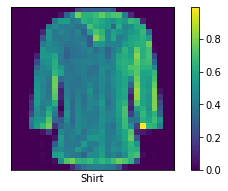

In [13]:
label = class_names[np.argmax(prediction[4])]
plt.figure(figsize=(6,3))
plt.imshow(X_test[4])
plt.xlabel(label)
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()